In [1]:
# ======================
# 📦 1. Import Libraries
# ======================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


In [2]:
# ===============================
# 📁 2. Load the 4 Main Datasets
# ===============================
activity = pd.read_csv('dailyActivity_merged.csv')
sleep = pd.read_csv('sleepDay_merged.csv')
weight = pd.read_csv('weightLogInfo_merged.csv')
heart = pd.read_csv('heartrate_seconds_merged.csv')


In [3]:
# ========================
# 🧼 3. Data Cleaning
# ========================

# Convert date/time columns
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
weight['Date'] = pd.to_datetime(weight['Date'])
heart['Time'] = pd.to_datetime(heart['Time'])

# Drop duplicates
activity.drop_duplicates(inplace=True)
sleep.drop_duplicates(inplace=True)
weight.drop_duplicates(inplace=True)
heart.drop_duplicates(inplace=True)

# Check for missing values
print("Missing Values:")
print(activity.isnull().sum())
print(sleep.isnull().sum())
print(weight.isnull().sum())
print(heart.isnull().sum())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3008\2657426346.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3008\2657426346.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight['Date'] = pd.to_datetime(weight['Date'])


Missing Values:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64
Id       0
Time     0
Value    0
dtype: int64


In [4]:
# ===================================
# 🔗 4. Merge Sleep + Activity (Optional)
# ===================================
merged = pd.merge(activity, sleep, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'], how='inner')


Step Count Summary:
count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64


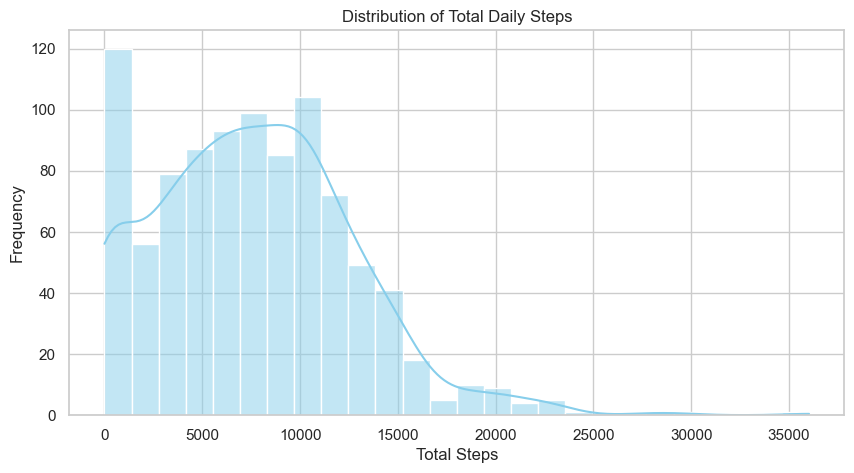

In [5]:
# ========================
# 📊 5. Data Exploration
# ========================

# --- A. Steps Summary ---
print("Step Count Summary:")
print(activity['TotalSteps'].describe())

sns.histplot(activity['TotalSteps'], kde=True, color='skyblue')
plt.title("Distribution of Total Daily Steps")
plt.xlabel("Total Steps")
plt.ylabel("Frequency")
plt.show()


Sleep Summary (in hours):
count    410.000000
mean       6.986220
std        1.977265
min        0.966667
25%        6.016667
50%        7.208333
75%        8.166667
max       13.266667
Name: TotalMinutesAsleep, dtype: float64


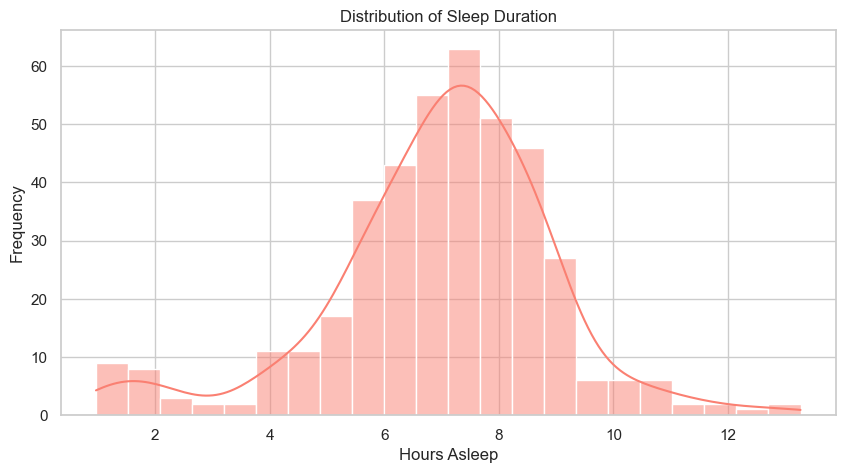

In [6]:
# --- B. Sleep Duration ---
print("Sleep Summary (in hours):")
print((sleep['TotalMinutesAsleep'] / 60).describe())

sns.histplot(sleep['TotalMinutesAsleep'] / 60, kde=True, color='salmon')
plt.title("Distribution of Sleep Duration")
plt.xlabel("Hours Asleep")
plt.ylabel("Frequency")
plt.show()


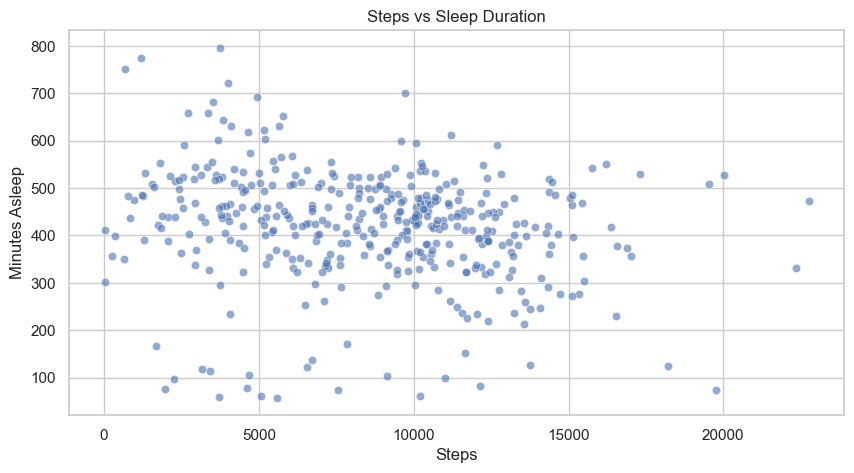

In [7]:
# --- C. Steps vs Sleep Scatter ---
sns.scatterplot(data=merged, x='TotalSteps', y='TotalMinutesAsleep', alpha=0.6)
plt.title("Steps vs Sleep Duration")
plt.xlabel("Steps")
plt.ylabel("Minutes Asleep")
plt.show()


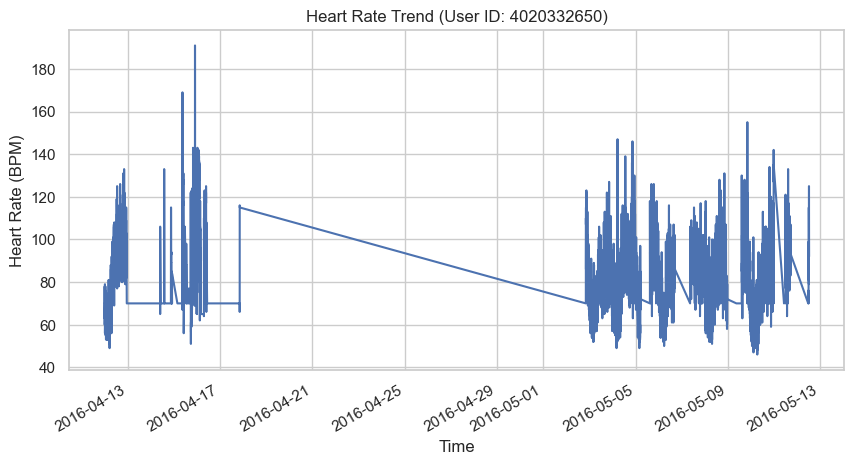

In [8]:
# --- D. Heart Rate Trend (One User) ---
# Pick the user with the most heart rate records
top_user = heart['Id'].value_counts().idxmax()
user_heart = heart[heart['Id'] == top_user]

user_heart.set_index('Time')['Value'].plot()
plt.title(f"Heart Rate Trend (User ID: {top_user})")
plt.ylabel("Heart Rate (BPM)")
plt.xlabel("Time")
plt.show()


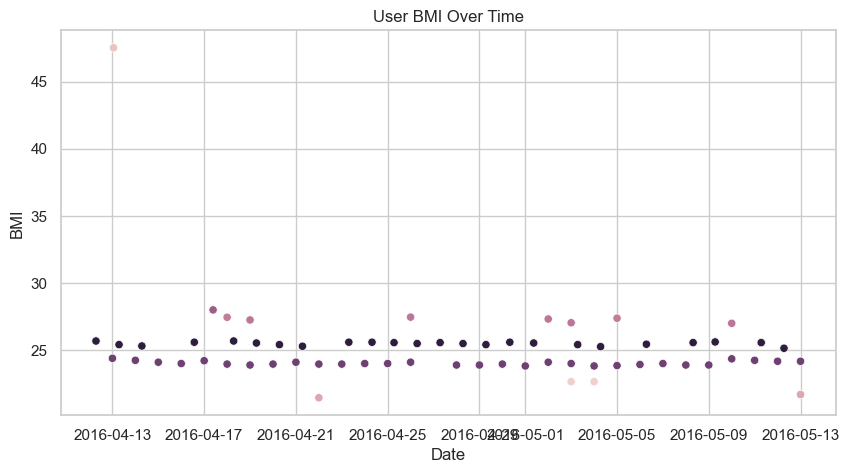

In [9]:
# --- E. Weight Trends ---
# Only include weight logs with BMI
weight_clean = weight.dropna(subset=['WeightKg', 'BMI'])

sns.scatterplot(data=weight_clean, x='Date', y='BMI', hue='Id', legend=False)
plt.title("User BMI Over Time")
plt.ylabel("BMI")
plt.xlabel("Date")
plt.show()


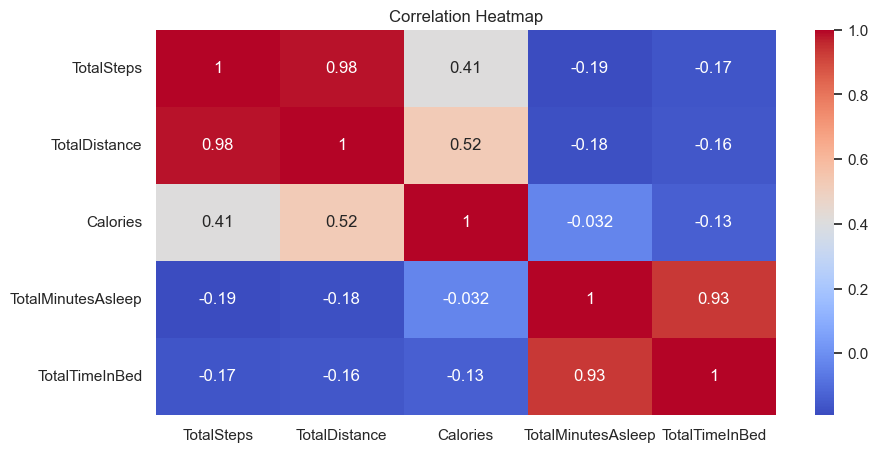

In [10]:
# --- F. Correlation Heatmap ---
corr = merged[['TotalSteps', 'TotalDistance', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


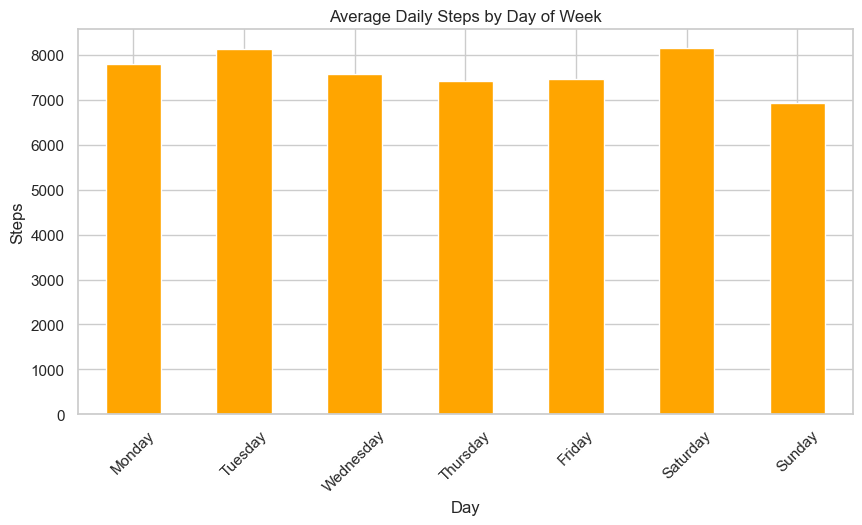

In [11]:
# --- G. Average Steps by Day of Week ---
activity['Day'] = activity['ActivityDate'].dt.day_name()
avg_steps_by_day = activity.groupby('Day')['TotalSteps'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

avg_steps_by_day.plot(kind='bar', color='orange')
plt.title("Average Daily Steps by Day of Week")
plt.ylabel("Steps")
plt.xticks(rotation=45)
plt.show()


# 📊 Bellabeat STRAVA Fitness Case Study

## 🎯 Objective
Analyze Fitbit/Strava user data to understand behavior patterns (steps, sleep, heart rate, weight) and recommend improvements for Bellabeat’s women’s wellness products.

---

## 📈 Key Insights
- Users with higher daily steps burn more calories (positive correlation)
- Most users average between 6–8 hours of sleep
- Daily step count drops significantly on weekends
- Heart rate and BMI show user-level variation — opportunity for personalized health insights

---

## 💡 Recommendations for Bellabeat
1. Promote weekend activity campaigns
2. Encourage consistent sleep routines
3. Use personalized feedback (BMI, HR trends) for user engagement
4. Target low-activity users with nudges/reminders

---

## 📎 Deliverables
- ✅ Python `.ipynb` file (this notebook)
- ✅ Exported `.pdf` of the notebook (via browser)
- ✅ Visuals: steps, sleep, HR, BMI, correlation, weekday patterns
